# KLUE - EDA, PREPROCESS, DATA AUGMENTATION

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import re
import pickle
from pororo import Pororo
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from collections import Counter
from transformers import AutoTokenizer, AutoConfig
from src.tokenization_kobert import KoBertTokenizer

# matplotlib 한글
plt.rc('font', family='AppleGothic')

In [9]:
df = pd.read_csv('../input/data/train/train.tsv', sep='\t', header=None)
df.columns = [str(i) for i in range(9)]

In [10]:
df.head()

,0,1,2,3,4,5,6,7,8
0,wikipedia-24896-25-30-33-19-21,영국에서 사용되는 스포츠 유틸리티 자동차의 브랜드로는 랜드로버(Land Rover)...,랜드로버,30,33,자동차,19,21,단체:제작
1,wikipedia-12728-224-5-7-42-44,"선거에서 민주당은 해산 전 의석인 230석에 한참 못 미치는 57석(지역구 27석,...",민주당,5,7,27석,42,44,관계_없음
2,wikipedia-28460-3-0-7-9-12,유럽 축구 연맹(UEFA) 집행위원회는 2014년 1월 24일에 열린 회의를 통해 ...,유럽 축구 연맹,0,7,UEFA,9,12,단체:별칭
3,wikipedia-11479-37-24-26-3-5,"용병 공격수 챠디의 부진과 시즌 초 활약한 강수일의 침체, 시즌 중반에 영입한 세르...",강수일,24,26,공격수,3,5,인물:직업/직함
4,wikipedia-15581-6-0-2-32-40,람캄행 왕은 1237년에서 1247년 사이 수코타이의 왕 퍼쿤 씨 인트라팃과 쓰엉 ...,람캄행,0,2,퍼쿤 씨 인트라팃,32,40,인물:부모님


### Target 분포

In [11]:
print(df['8'].nunique())

42


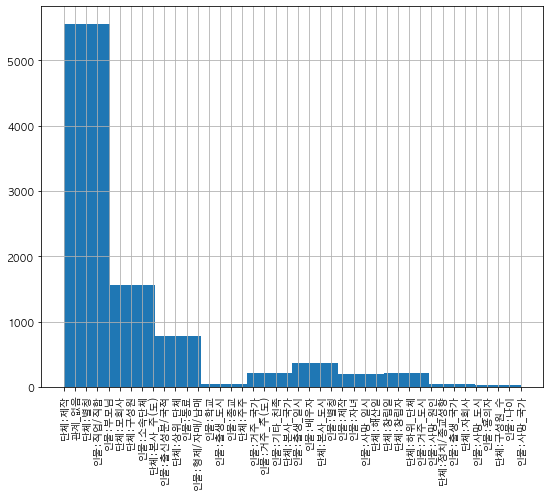

In [12]:
plt.figure(figsize=(9, 7))
plt.xticks(rotation=90)
df['8'].hist()
plt.show()

In [13]:
df['8'].value_counts()

관계_없음          4432
단체:구성원          815
인물:소속단체         683
인물:직업/직함        553
단체:상위_단체        335
단체:별칭           231
인물:출신성분/국적      209
인물:동료           186
단체:제작           171
인물:부모님          164
단체:본사_도시        135
단체:본사_국가        115
인물:별칭           103
인물:배우자           92
인물:자녀            84
단체:하위_단체         79
단체:창립일           67
인물:기타_친족         58
인물:제작            56
인물:형제/자매/남매      52
인물:사망_일시         45
단체:창립자           45
단체:모회사           44
인물:출생_일시         36
인물:거주_국가         27
인물:거주_도시         26
단체:본사_주(도)       23
단체:정치/종교성향       18
단체:해산일           15
인물:종교            15
인물:거주_주(도)       12
단체:주주            11
인물:용의자           11
인물:학교             9
단체:구성원_수          9
인물:출생_국가          8
인물:사망_원인          7
단체:자회사            6
인물:나이             5
인물:출생_도시          4
인물:사망_도시          3
인물:사망_국가          1
Name: 8, dtype: int64

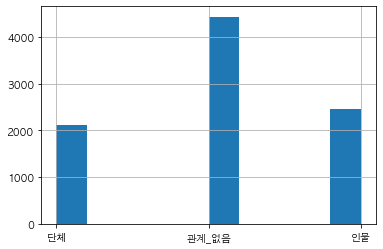

In [14]:
df['8'].apply(lambda x: x.split(':')[0]).hist()
plt.show()

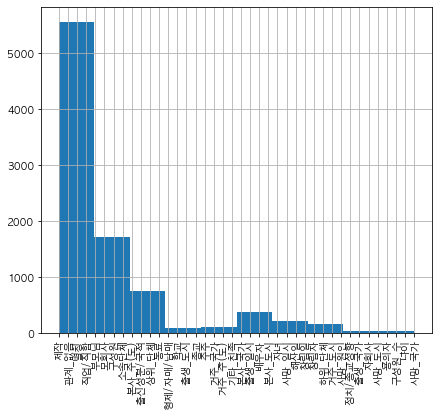

40


In [15]:
plt.figure(figsize=(7, 6))
plt.xticks(rotation=90)
df['8'].apply(lambda x: x.split(':')[-1]).hist()
plt.show()
print(df['8'].apply(lambda x: x.split(':')[-1]).nunique())

### Entity 분석

In [16]:
# how many entities

entities = []
entities.extend(df['2'].to_list())
entities.extend(df['5'].to_list())
print(len(entities))

18000


In [17]:
# 한글 미포함

hangul = re.compile('[ㄱ-ㅣ가-힣]+')
count = 0
for i in range(len(entities)):
    if len(hangul.findall(entities[i])) == 0:
        count += 1
        print(entities[i], end=' ')
print()
print(count)

OIE UBS MBC NASA KT Marie ABC SPFL LVMH A KCC IOC KCC 慶應 黃皓 Benedict Cumberbatch HUG UBS Bic Metallica KGET Kerrigan EXID GD&TOP FIFA MBC KAIST SBS ICAO A CBS JTWC A SBS RCA LVMH G-Dragon UN Fairies OECD ☎ Britney A GAP MBC KIA KT&G KBS Joy ASML GNU CNN 帶原君 SKC FIFA K A MBC A ASME d THX MBC 金 EU NBA L A Kylie MIT KBS MBC LPGA 中宗 DHC LH MBC SMAP PDH A LH MLB B BTS IBM IBM UEFA JTWC MLB SMAP Key MBC SKC KT&G A EBS SBS tvN KT Seventeen KMFDM A Deze CSIS MBN MBC B LG U SBS DeNA R.E.M. Oh! MBC MBC GS SHOP UEFA mariage KBS UNM Georg Saver Tiger A SK ㈜ A FDA AEK ASAYAN A CJ BBC A YTN 4-H 李集 Metallica EBS Pile DJ DOC Concern Worldwide B*Witched S MBC ABI Mnet SBS A GKL 45RPM CJ ENM A ClariS ABBA MOU FTA A C EVISU John II Casimir BBC EXILE NERIT ANU UBS A NASA EBS UN USL KT 李址鎔 SBS LH AKA of CN WTO RCA EASD GS SHOP IMO CNN LIG IAEA GNU BMW OCN Taylor Swift Vaynerchuk NBC A KBS2 EG A A A MBC USCG MBC 竇武 丸彫 of PRASAC A NPT B Mr.Children EXID MBC Suede tvN BPA A AKA A EBS KT&G MBC 李福男 KBS Joy KBS 

### NER

In [ ]:
def tag_ner(df):
    ner = Pororo(task='ner', lang='ko')
    ne_1 = []
    ne_2 = []
    for idx in tqdm(range(len(df))):
        row = df.iloc[idx, :]
        ner_results = {k: v for k, v in ner(row['1'])}
        if row['2'] in ner_results and row['5'] in ner_results:
            en_1, en_2 = ner_results[row['2']], ner_results[row['5']]
        else:
            en_1, en_2 = None, None
        ne_1.append(en_1)
        ne_2.append(en_2)

    df['9'] = ne_1
    df['10'] = ne_2

In [18]:
ner = Pororo(task='ner', lang='ko')


[nltk_data] Downloading package punkt to /Users/swhong/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.



In [19]:
for idx in range(len(df)):
    row = df.iloc[idx, :]
    ner_results = {k: v for k, v in ner(row['1'])}
    if row['2'] in ner_results and row['5'] in ner_results:
        en_1, en_2 = ner_results[row['2']], ner_results[row['5']]
    else:
        en_1, en_2 = None, None
    print(en_1, en_2, '|', row['2'], row['5'], '|', row['8'])
    
    if idx == 30:
        break

ORGANIZATION ARTIFACT | 랜드로버 자동차 | 단체:제작
ORGANIZATION QUANTITY | 민주당 27석 | 관계_없음
ORGANIZATION ORGANIZATION | 유럽 축구 연맹 UEFA | 단체:별칭
PERSON CIVILIZATION | 강수일 공격수 | 인물:직업/직함
PERSON PERSON | 람캄행 퍼쿤 씨 인트라팃 | 인물:부모님
ORGANIZATION OCCUPATION | OIE 전문가 | 관계_없음
ORGANIZATION ARTIFACT | 기아자동차 K5 | 단체:제작
ORGANIZATION ORGANIZATION | 나고야 그램퍼스 토요타 자동차 | 단체:모회사
ORGANIZATION PERSON | 조선대학교 조영주 | 단체:구성원
ORGANIZATION QUANTITY | 삼성SDS 10% | 관계_없음
PERSON ORGANIZATION | 심상정 정의당 | 인물:소속단체
None None | 유신정우회 한국국민당 | 관계_없음
ARTIFACT CITY | 메종 글래드 제주 제주 | 단체:본사_주(도)
PERSON ORGANIZATION | 대니 웰벡 아스널 | 인물:소속단체
None None | 리처드 1세 제3차 십자군 | 관계_없음
PERSON OCCUPATION | 고레에다 히로카즈 배우 | 관계_없음
PERSON PERSON | 윤희 새봄 | 관계_없음
None None | 한국 기상청 약 370km | 관계_없음
PERSON ORGANIZATION | 문재인 더불어민주당 | 인물:소속단체
None None | 알베르트 아인슈타인 물리학 | 관계_없음
None None | 중앙도서관 시흥시 | 관계_없음
PERSON ORGANIZATION | 진숙보 진나라 | 인물:출신성분/국적
ORGANIZATION ARTIFACT | 포르쉐 자동차 | 단체:제작
PERSON OCCUPATION | 염건령 강사 | 인물:직업/직함
ORGANIZATION ORGANIZATION | 교육부 교육과학기술부 | 단

탐지된 NER 끼리 관계가 있어 보여도, 문맥에서 관계를 도출할 수 없으면 관계 없음으로 분류되어야함.  
데이터셋에 우선 포함 시켜봄

In [21]:
ne_1 = []
ne_2 = []
for idx in tqdm(range(len(df[:30]))):
    row = df.iloc[idx, :]
    ner_results = {k: v for k, v in ner(row['1'])}
    if row['2'] in ner_results and row['5'] in ner_results:
        en_1, en_2 = ner_results[row['2']], ner_results[row['5']]
    else:
        en_1, en_2 = None, None
    ne_1.append(en_1)
    ne_2.append(en_2)

df['9'] = ne_1
df['10'] = ne_2

100%|██████████| 30/30 [00:05<00:00,  5.30it/s]


ValueError: Length of values (30) does not match length of index (9000)

In [54]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,wikipedia-24896-25-30-33-19-21,영국에서 사용되는 스포츠 유틸리티 자동차의 브랜드로는 랜드로버(Land Rover)...,랜드로버,30,33,자동차,19,21,단체:제작,ORGANIZATION,ARTIFACT
1,wikipedia-12728-224-5-7-42-44,"선거에서 민주당은 해산 전 의석인 230석에 한참 못 미치는 57석(지역구 27석,...",민주당,5,7,27석,42,44,관계_없음,ORGANIZATION,QUANTITY
2,wikipedia-28460-3-0-7-9-12,유럽 축구 연맹(UEFA) 집행위원회는 2014년 1월 24일에 열린 회의를 통해 ...,유럽 축구 연맹,0,7,UEFA,9,12,단체:별칭,ORGANIZATION,ORGANIZATION
3,wikipedia-11479-37-24-26-3-5,"용병 공격수 챠디의 부진과 시즌 초 활약한 강수일의 침체, 시즌 중반에 영입한 세르...",강수일,24,26,공격수,3,5,인물:직업/직함,PERSON,CIVILIZATION
4,wikipedia-15581-6-0-2-32-40,람캄행 왕은 1237년에서 1247년 사이 수코타이의 왕 퍼쿤 씨 인트라팃과 쓰엉 ...,람캄행,0,2,퍼쿤 씨 인트라팃,32,40,인물:부모님,PERSON,PERSON


In [9]:
ner_tokens = [i for i in df['9'].unique()]
ner_tokens.extend([i for i in df['10'].unique()])
ner_tokens = list(set(ner_tokens))
ner_tokens_processed = []
for token in ner_tokens:
    a = f'[{token}]'
    b = f'[/{token}]'
    ner_tokens_processed.append(a)
    ner_tokens_processed.append(b)
print(ner_tokens_processed)

KeyError: '9'

In [56]:
new_s_lst = []
for idx in tqdm(range(len(df))):
    row = df.iloc[idx, :]
    s = row['1']
    new_s = s.replace(row['2'], '[{}] {} [/{}]'.format(row['9'], row['2'], row['9']))
    new_s = new_s.replace(row['5'], '[{}] {} [/{}]'.format(row['10'], row['5'], row['10']))
    new_s_lst.append(new_s)
df['11'] = new_s_lst
del new_s_lst

100%|██████████| 9000/9000 [00:01<00:00, 5424.91it/s]


In [4]:
# ONLY ENTITY TOKEN
new_s_lst = []
for idx in tqdm(range(len(df))):
    row = df.iloc[idx, :]
    s = row['1']
    new_s = s.replace(row['2'], '[{}] {} [/{}]'.format('ENTITY', row['2'], 'ENTITY'))
    new_s = new_s.replace(row['5'], '[{}] {} [/{}]'.format('ENTITY', row['5'], 'ENTITY'))
    new_s_lst.append(new_s)
df['11'] = new_s_lst
del new_s_lst

100%|██████████| 9000/9000 [00:01<00:00, 5973.57it/s]


In [18]:
df

,0,1,2,3,4,5,6,7,8,11
0,wikipedia-24896-25-30-33-19-21,영국에서 사용되는 스포츠 유틸리티 자동차의 브랜드로는 랜드로버(Land Rover)...,랜드로버,30,33,자동차,19,21,단체:제작,영국에서 사용되는 스포츠 유틸리티 [E2] 자동차 [/E2]의 브랜드로는 [E1] ...
1,wikipedia-12728-224-5-7-42-44,"선거에서 민주당은 해산 전 의석인 230석에 한참 못 미치는 57석(지역구 27석,...",민주당,5,7,27석,42,44,관계_없음,선거에서 [E1] 민주당 [/E1]은 해산 전 의석인 230석에 한참 못 미치는 5...
2,wikipedia-28460-3-0-7-9-12,유럽 축구 연맹(UEFA) 집행위원회는 2014년 1월 24일에 열린 회의를 통해 ...,유럽 축구 연맹,0,7,UEFA,9,12,단체:별칭,[E1] 유럽 축구 연맹 [/E1]([E2] UEFA [/E2]) 집행위원회는 20...
3,wikipedia-11479-37-24-26-3-5,"용병 공격수 챠디의 부진과 시즌 초 활약한 강수일의 침체, 시즌 중반에 영입한 세르...",강수일,24,26,공격수,3,5,인물:직업/직함,용병 [E2] 공격수 [/E2] 챠디의 부진과 시즌 초 활약한 [E1] 강수일 [/...
4,wikipedia-15581-6-0-2-32-40,람캄행 왕은 1237년에서 1247년 사이 수코타이의 왕 퍼쿤 씨 인트라팃과 쓰엉 ...,람캄행,0,2,퍼쿤 씨 인트라팃,32,40,인물:부모님,[E1] 람캄행 [/E1] 왕은 1237년에서 1247년 사이 수코타이의 왕 [E2...
...,...,...,...,...,...,...,...,...,...,...
8995,wikipedia-5414-12-15-21-0-4,2002년 FIFA 월드컵 사우디아라비아와의 1차전에서 독일은 8-0으로 승리하였는...,사우디아라비아,15,21,2002년,0,4,관계_없음,[E2] 2002년 [/E2] FIFA 월드컵 [E1] 사우디아라비아 [/E1]와의...
8996,wikipedia-10384-4-12-14-0-1,일본의 2대 메이커인 토요타와 닛산은 시장 점유율을 높이기 위한 신차 개발을 계속하...,토요타,12,14,일본,0,1,단체:본사_국가,[E2] 일본 [/E2]의 2대 메이커인 [E1] 토요타 [/E1]와 닛산은 시장 ...
8997,wikipedia-25913-6-8-10-93-106,방호의의 손자 방덕룡(方德龍)은 1588년(선조 21년) 무과에 급제하고 낙안군수로...,방덕룡,8,10,선무원종공신(宣武原從功臣),93,106,인물:직업/직함,방호의의 손자 [E1] 방덕룡 [/E1](方德龍)은 1588년(선조 21년) 무과에...
8998,wikitree-12062-15-0-3-46-47,LG전자는 올해 초 국내시장에 출시한 2020년형 ‘LG 그램’ 시리즈를 이달부터 ...,LG전자,0,3,북미,46,47,관계_없음,[E1] LG전자 [/E1]는 올해 초 국내시장에 출시한 2020년형 ‘LG 그램’...


In [10]:
entity_tokens = ['[E1]', '[/E1]', '[E2]', '[/E2]']

In [11]:
with open('../input/data/train/entity_tokens.pickle', 'wb') as f:
    pickle.dump(entity_tokens, f)

### Machine Translation

In [191]:
mt = Pororo(task='translation', lang='multi')

In [196]:
mt('中宗', src='ko', tgt='en')

'a central species'

### Tokenizer 테스트

In [189]:
# 토크나이저 성능비교

def tokenizer_performance_test(MODEL_NAME, save_n=10):
    if MODEL_NAME == 'monologg/kobert':
        tokenizer = KoBertTokenizer.from_pretrained('monologg/kobert')
    else:
        tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
    unk_counter = 0
    token_counter = 0
    sample_texts = []
    for i in tqdm(range(len(df))):
        s = df['1'][i]
        tokenized = tokenizer.tokenize(s)
        token_counter += len(tokenized)
        rev = Counter(tokenizer.convert_ids_to_tokens(tokenizer.convert_tokens_to_ids(tokenized)))
        if '[UNK]' in rev:
            unk_counter += rev['[UNK]']
        if len(sample_texts) <= save_n:
            sample_texts.append(tokenized)
    return unk_counter / token_counter, token_counter, sample_texts

100%|██████████| 9000/9000 [00:03<00:00, 2380.82it/s]


xlm-roberta-large : 0.0 (num all tokens):  520255
[['▁영국', '에서', '▁사용', '되는', '▁스포츠', '▁유', '틸', '리', '티', '▁자동차', '의', '▁브랜드', '로는', '▁', '랜드', '로', '버', '(', 'Land', '▁Rover', ')', '와', '▁지', '프', '(', 'Je', 'ep', ')', '가', '▁있으며', ',', '▁이', '▁브랜드', '들은', '▁자동차', '의', '▁종류', '를', '▁일', '컫', '는', '▁말', '로', '▁사용', '되기', '도', '▁한다', '.'], ['▁선거', '에서', '▁민주당', '은', '▁해', '산', '▁전', '▁의', '석', '인', '▁230', '석', '에', '▁한', '참', '▁못', '▁미', '치는', '▁57', '석', '(', '지역', '구', '▁27', '석', ',', '▁비', '례', '대표', '▁30', '석', ')', '을', '▁획득', '하는', '▁데', '▁그', '쳤다', '.'], ['▁유럽', '▁축구', '▁연', '맹', '(', 'UE', 'FA', ')', '▁집', '행', '위원회', '는', '▁2014', '년', '▁1', '월', '▁24', '일에', '▁열린', '▁', '회의', '를', '▁통해', '▁2017', '년', '▁대회', '부터', '▁UEFA', '▁U', '-21', '▁축구', '▁선수', '권', '▁대회', '▁참가', '국', '을', '▁8', '개', '국', '에서', '▁12', '개', '국', '으로', '▁확대', '하기로', '▁결정', '했다', '.'], ['▁용', '병', '▁공격', '수', '▁', '챠', '디', '의', '▁부', '진', '과', '▁시즌', '▁초', '▁활약', '한', '▁강', '수', '일', '의', '▁침', '체', ',',

100%|██████████| 9000/9000 [00:03<00:00, 2642.39it/s]


kykim/bert-kor-base : 0.027652153024431258 (num all tokens):  407961
[['영국', '##에서', '사용되는', '스포츠', '유틸', '##리티', '자동차의', '브랜드로', '##는', '랜드', '##로', '##버', '(', 'la', '##nd', 'ro', '##ver', ')', '와', '지', '##프', '(', 'j', '##ee', '##p', ')', '가', '있으며', ',', '이', '브랜드', '##들은', '자동차의', '종류를', '일컫', '##는', '말로', '사용', '##되기도', '한다', '.'], ['선거에서', '민주당은', '해산', '전', '의', '##석', '##인', '230', '##석에', '한참', '못', '미치는', '57', '##석', '(', '지역', '##구', '27', '##석', ',', '비례', '##대표', '30', '##석', ')', '을', '획득', '##하는', '데', '그쳤다', '.'], ['유럽', '축구', '연', '##맹', '(', 'u', '##ef', '##a', ')', '집행', '##위원회는', '2014년', '1월', '24일', '##에', '열린', '회의를', '통해', '2017년', '대회', '##부터', 'u', '##ef', '##a', 'u', '-', '21', '축구', '선수', '##권', '대회', '참가', '##국을', '8개', '##국에서', '12개', '##국으로', '확대', '##하기로', '결정했다', '.'], ['용병', '공격', '##수', '챠', '##디의', '부진', '##과', '시즌', '초', '활약', '##한', '강', '##수', '##일의', '침체', ',', '시즌', '중반', '##에', '영입', '##한', '세', '##르', '##비아', '출신', '용병', '미드', '##필', '##더',

  4%|▍         | 394/9000 [00:00<00:02, 3936.47it/s]

100%|██████████| 9000/9000 [00:02<00:00, 3912.48it/s]


monologg/kobert : 0.003373459323750232 (num all tokens):  500673
[['▁영국', '에서', '▁사용', '되는', '▁스포츠', '▁유', '틸', '리', '티', '▁자동차', '의', '▁브랜드', '로', '는', '▁', '랜드', '로', '버', '(', 'L', 'an', 'd', '▁R', 'o', 'ver', ')', '와', '▁지', '프', '(', 'J', 'e', 'e', 'p', ')', '가', '▁있으며', ',', '▁이', '▁브랜드', '들은', '▁자동차', '의', '▁종류', '를', '▁일', '컫', '는', '▁말', '로', '▁사용', '되기', '도', '▁한다', '.'], ['▁선거', '에서', '▁민주당은', '▁해', '산', '▁전', '▁', '의', '석', '인', '▁2', '30', '석', '에', '▁한', '참', '▁못', '▁미치는', '▁', '57', '석', '(', '지역', '구', '▁27', '석', ',', '▁비', '례', '대표', '▁30', '석', ')', '을', '▁획득', '하는', '▁데', '▁그쳤다', '.'], ['▁유럽', '▁축구', '▁', '연맹', '(', 'U', 'E', 'F', 'A', ')', '▁집행', '위원회는', '▁2014', '년', '▁1', '월', '▁24', '일', '에', '▁열린', '▁회의를', '▁통해', '▁2017', '년', '▁대회', '부터', '▁U', 'E', 'F', 'A', '▁U', '-', '21', '▁축구', '▁선수', '권', '▁대회', '▁참가', '국', '을', '▁8', '개국', '에서', '▁12', '개국', '으로', '▁확대', '하기로', '▁결정했다', '.'], ['▁용', '병', '▁공격수', '▁', '챠', '디', '의', '▁부진', '과', '▁시즌', '▁초', '▁활약', '한', '

100%|██████████| 9000/9000 [00:03<00:00, 2427.33it/s]


monologg/koelectra-base-v3-discriminator : 0.000603269891559073 (num all tokens):  474083
[['영국', '##에', '##서', '사용', '##되', '##는', '스포츠', '유틸리티', '자동차', '##의', '브랜드', '##로', '##는', '랜드', '##로', '##버', '(', 'La', '##nd', 'R', '##over', ')', '와', '지프', '(', 'Je', '##ep', ')', '가', '있', '##으며', ',', '이', '브랜드', '##들', '##은', '자동차', '##의', '종류', '##를', '일컫', '##는', '말', '##로', '사용', '##되', '##기', '##도', '한다', '.'], ['선거', '##에', '##서', '민주당', '##은', '해산', '전', '의석', '##인', '230', '##석', '##에', '한참', '못', '미치', '##는', '57', '##석', '(', '지역구', '27', '##석', ',', '비례', '##대표', '30', '##석', ')', '을', '획득', '##하', '##는', '데', '그쳤', '##다', '.'], ['유럽', '축구', '연맹', '(', 'UEFA', ')', '집행', '##위원회', '##는', '2014', '##년', '1', '##월', '24', '##일', '##에', '열린', '회의', '##를', '통해', '2017', '##년', '대회', '##부터', 'UEFA', 'U', '-', '21', '축구', '선수', '##권', '대회', '참가', '##국', '##을', '8', '##개', '##국', '##에', '##서', '12', '##개', '##국', '##으로', '확대', '##하', '##기', '##로', '결정', '##했', '##다', '.'], ['용병', '공격수',

100%|██████████| 9000/9000 [00:03<00:00, 2339.28it/s]


bert-base-multilingual-cased : 0.007696084426507002 (num all tokens):  564183
[['영국', '##에서', '사', '##용', '##되는', '스', '##포츠', '유', '##틸', '##리', '##티', '자', '##동차', '##의', '브', '##랜드', '##로는', '랜', '##드', '##로', '##버', '(', 'Land', 'Rover', ')', '와', '지', '##프', '(', 'Je', '##ep', ')', '가', '있으며', ',', '이', '브', '##랜드', '##들은', '자', '##동차', '##의', '종', '##류', '##를', '일', '##컫', '##는', '말', '##로', '사', '##용', '##되', '##기도', '한다', '.'], ['선', '##거', '##에서', '민', '##주', '##당', '##은', '해', '##산', '전', '의', '##석', '##인', '230', '##석', '##에', '한', '##참', '못', '미', '##치는', '57', '##석', '(', '지역', '##구', '27', '##석', ',', '비', '##례', '##대', '##표', '30', '##석', ')', '을', '획', '##득', '##하는', '데', '그', '##쳤다', '.'], ['유럽', '축구', '연', '##맹', '(', 'UEFA', ')', '집', '##행', '##위원회', '##는', '2014년', '1월', '24일', '##에', '열린', '회', '##의를', '통해', '2017년', '대회', '##부터', 'UEFA', 'U', '-', '21', '축구', '선수', '##권', '대회', '참', '##가', '##국', '##을', '8', '##개', '##국', '##에서', '12', '##개', '##국', '##으로', '확', '

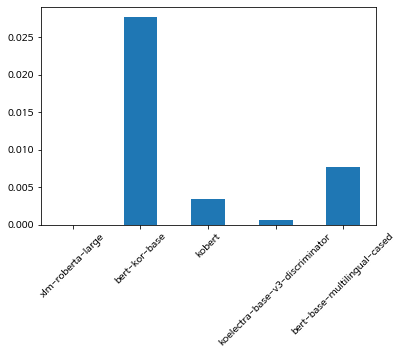

In [190]:
models_lst = ['xlm-roberta-large', 'kykim/bert-kor-base', 'monologg/kobert', "monologg/koelectra-base-v3-discriminator", 'bert-base-multilingual-cased']
tok_performance_results = []
for m in models_lst:
    r = tokenizer_performance_test(m)
    print(m, ':', r[0], '(num all tokens): ', r[1])
    tok_performance_results.append(r[0])
    print(r[-1])
    
plt.xticks(rotation=45)
plt.bar(list(map(lambda x: x.split('/')[-1], models_lst)), tok_performance_results, width=0.5)
plt.show()

In [164]:
# ner token 추가

MODEL_NAME = "kykim/bert-kor-base"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

special_tokens_dict = {'additional_special_tokens': ner_tokens_processed}
tokenizer.add_special_tokens(special_tokens_dict)

model_config = AutoConfig.from_pretrained(MODEL_NAME)
model_config.vocab_size += len(ner_tokens_processed)
model_config

BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "directionality": "bidi",
  "embedding_size": 768,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "transformers_version": "4.2.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 42042
}

## Final Process

In [61]:
df_train, df_valid = train_test_split(df, test_size=0.1, random_state=42)
df_train.to_csv('../input/data/train/train_no_ner.tsv', sep='\t', header=None, index=None)
df_valid.to_csv('../input/data/train/valid_no_ner.tsv', sep='\t', header=None, index=None)

In [62]:
df_final = df.copy()
df_final['1'] = df_final['11']
df_train, df_valid = train_test_split(df_final, test_size=0.1, random_state=42)
df_train.to_csv('../input/data/train/train_ner.tsv', sep='\t', header=None, index=None)
df_valid.to_csv('../input/data/train/valid_ner.tsv', sep='\t', header=None, index=None)

In [15]:
df.head()

,0,1,2,3,4,5,6,7,8,11
0,wikipedia-24896-25-30-33-19-21,영국에서 사용되는 스포츠 유틸리티 자동차의 브랜드로는 랜드로버(Land Rover)...,랜드로버,30,33,자동차,19,21,단체:제작,영국에서 사용되는 스포츠 유틸리티 [E2] 자동차 [/E2]의 브랜드로는 [E1] ...
1,wikipedia-12728-224-5-7-42-44,"선거에서 민주당은 해산 전 의석인 230석에 한참 못 미치는 57석(지역구 27석,...",민주당,5,7,27석,42,44,관계_없음,선거에서 [E1] 민주당 [/E1]은 해산 전 의석인 230석에 한참 못 미치는 5...
2,wikipedia-28460-3-0-7-9-12,유럽 축구 연맹(UEFA) 집행위원회는 2014년 1월 24일에 열린 회의를 통해 ...,유럽 축구 연맹,0,7,UEFA,9,12,단체:별칭,[E1] 유럽 축구 연맹 [/E1]([E2] UEFA [/E2]) 집행위원회는 20...
3,wikipedia-11479-37-24-26-3-5,"용병 공격수 챠디의 부진과 시즌 초 활약한 강수일의 침체, 시즌 중반에 영입한 세르...",강수일,24,26,공격수,3,5,인물:직업/직함,용병 [E2] 공격수 [/E2] 챠디의 부진과 시즌 초 활약한 [E1] 강수일 [/...
4,wikipedia-15581-6-0-2-32-40,람캄행 왕은 1237년에서 1247년 사이 수코타이의 왕 퍼쿤 씨 인트라팃과 쓰엉 ...,람캄행,0,2,퍼쿤 씨 인트라팃,32,40,인물:부모님,[E1] 람캄행 [/E1] 왕은 1237년에서 1247년 사이 수코타이의 왕 [E2...


In [16]:
df_final2 = df.copy()
df_final2['1'] = df_final2['11']
df_train, df_valid = train_test_split(df_final2, test_size=0.1, random_state=42)
df_train.to_csv('../input/data/train/train_ent.tsv', sep='\t', header=None, index=None)
df_valid.to_csv('../input/data/train/valid_ent.tsv', sep='\t', header=None, index=None)

In [65]:
with open('../input/data/train/ner_tags.pickle', 'wb') as f:
    pickle.dump(ner_tokens_processed, f)

## Test Data Process

In [17]:
df_test = pd.read_csv('../input/data/test/test.tsv', sep='\t', header=None)
df_test.columns = [str(i) for i in range(9)]

df_test.head()

,0,1,2,3,4,5,6,7,8
0,wikipedia-15133-19-0-2-45-46,"이은주의 첫 영화로, 그녀가 강수연(정화 역)의 동생 세화 역으로 출연한 박종원 감...",이은주,0,2,감독,45,46,blind
1,wikitree-10241-0-0-4-9-11,경성대학교(총장 송수건) 미술학과 졸업예정 학생들이 부산 지역의 유망한 청년예술가에...,경성대학교,0,4,송수건,9,11,blind
2,wikipedia-24909-38-83-89-45-48,하더라도 만일 그녀의 아들에게 계승시킬 수 있다면 영국 왕 에드워드 2세의 왕비 이...,에드워드 3세,83,89,이사벨라,45,48,blind
3,wikitree-29775-2-38-43-17-18,정성으로 담근 700포기의 김장김치는 발굴된 저소득 가정 55세대에 새마을부녀회 회...,새마을부녀회,38,43,김치,17,18,blind
4,wikipedia-20874-21-8-9-30-32,"노트북은 이들 정부에 판매될 것이며 ""하나의 노트북을 한 명의 어린이마다""라는 정책...",정부,8,9,한 명,30,32,blind


In [124]:
with open('../input/data/train/ner_tags.pickle', 'rb') as f:
    ner_tokens = pickle.load(f)
print(ner_tokens)

['[ARTIFACT]', '[/ARTIFACT]', '[OCCUPATION]', '[/OCCUPATION]', '[PLANT]', '[/PLANT]', '[ANIMAL]', '[/ANIMAL]', '[DATE]', '[/DATE]', '[STUDY_FIELD]', '[/STUDY_FIELD]', '[EVENT]', '[/EVENT]', '[LOCATION]', '[/LOCATION]', '[DISEASE]', '[/DISEASE]', '[QUANTITY]', '[/QUANTITY]', '[COUNTRY]', '[/COUNTRY]', '[TERM]', '[/TERM]', '[ORGANIZATION]', '[/ORGANIZATION]', '[O]', '[/O]', '[CIVILIZATION]', '[/CIVILIZATION]', '[PERSON]', '[/PERSON]', '[TIME]', '[/TIME]', '[None]', '[/None]', '[MATERIAL]', '[/MATERIAL]', '[THEORY]', '[/THEORY]', '[CITY]', '[/CITY]']


In [125]:
re.sub('\[|\]', '', '[ARTIFACT]')

'ARTIFACT'

In [126]:
ne_1 = []
ne_2 = []

ner_tokens_pure = [re.sub('\[|\]', '', t) for t in ner_tokens]
print(ner_tokens_pure)

for idx in tqdm(range(len(df_test))):
    row = df_test.iloc[idx, :]
    ner_results = {k: v for k, v in ner(row['1'])}
    if row['2'] in ner_results and row['5'] in ner_results:
        if ner_results[row['2']] in ner_tokens_pure:
            en_1 = ner_results[row['2']]
        else:
            print(ner_results[row['2']])
            en_1 = None
        if ner_results[row['5']] in ner_tokens_pure:
            en_2 = ner_results[row['5']]
        else:
            print(ner_results[row['5']])
            en_2 = None
    else:
        en_1, en_2 = None, None
    ne_1.append(en_1)
    ne_2.append(en_2)

df_test['9'] = ne_1
df_test['10'] = ne_2

  1%|          | 7/1000 [00:00<00:16, 61.25it/s]

['ARTIFACT', '/ARTIFACT', 'OCCUPATION', '/OCCUPATION', 'PLANT', '/PLANT', 'ANIMAL', '/ANIMAL', 'DATE', '/DATE', 'STUDY_FIELD', '/STUDY_FIELD', 'EVENT', '/EVENT', 'LOCATION', '/LOCATION', 'DISEASE', '/DISEASE', 'QUANTITY', '/QUANTITY', 'COUNTRY', '/COUNTRY', 'TERM', '/TERM', 'ORGANIZATION', '/ORGANIZATION', 'O', '/O', 'CIVILIZATION', '/CIVILIZATION', 'PERSON', '/PERSON', 'TIME', '/TIME', 'None', '/None', 'MATERIAL', '/MATERIAL', 'THEORY', '/THEORY', 'CITY', '/CITY']


100%|██████████| 1000/1000 [00:16<00:00, 60.37it/s]


In [111]:
df_test['9'].value_counts()

PERSON          350
ORGANIZATION    324
COUNTRY          13
CIVILIZATION      9
O                 9
LOCATION          6
ARTIFACT          5
TERM              2
CITY              1
THEORY            1
ANIMAL            1
EVENT             1
STUDY_FIELD       1
DATE              1
Name: 9, dtype: int64

In [19]:
new_s_lst = []
for idx in tqdm(range(len(df_test))):
    row = df_test.iloc[idx, :]
    s = row['1']
    new_s = s.replace(row['2'], '[{}] {} [/{}]'.format('[E1]', row['2'], '[/E1]'))
    new_s = new_s.replace(row['5'], '[{}] {} [/{}]'.format('[E2]', row['5'], '[/E2]'))
    new_s_lst.append(new_s)
df_test['11'] = new_s_lst
del new_s_lst

100%|██████████| 1000/1000 [00:00<00:00, 6038.80it/s]


In [20]:
df_test_copy = df_test.copy()
df_test_copy['1'] = df_test_copy['11']
df_test_copy.head()

,0,1,2,3,4,5,6,7,8,11
0,wikipedia-15133-19-0-2-45-46,"[[E1]] 이은주 [/[/E1]]의 첫 영화로, 그녀가 강수연(정화 역)의 동생 ...",이은주,0,2,감독,45,46,blind,"[[E1]] 이은주 [/[/E1]]의 첫 영화로, 그녀가 강수연(정화 역)의 동생 ..."
1,wikitree-10241-0-0-4-9-11,[[E1]] 경성대학교 [/[/E1]](총장 [[E2]] 송수건 [/[/E2]]) ...,경성대학교,0,4,송수건,9,11,blind,[[E1]] 경성대학교 [/[/E1]](총장 [[E2]] 송수건 [/[/E2]]) ...
2,wikipedia-24909-38-83-89-45-48,하더라도 만일 그녀의 아들에게 계승시킬 수 있다면 영국 왕 에드워드 2세의 왕비 [...,에드워드 3세,83,89,이사벨라,45,48,blind,하더라도 만일 그녀의 아들에게 계승시킬 수 있다면 영국 왕 에드워드 2세의 왕비 [...
3,wikitree-29775-2-38-43-17-18,정성으로 담근 700포기의 김장[[E2]] 김치 [/[/E2]]는 발굴된 저소득 가...,새마을부녀회,38,43,김치,17,18,blind,정성으로 담근 700포기의 김장[[E2]] 김치 [/[/E2]]는 발굴된 저소득 가...
4,wikipedia-20874-21-8-9-30-32,"노트북은 이들 [[E1]] 정부 [/[/E1]]에 판매될 것이며 ""하나의 노트북을 ...",정부,8,9,한 명,30,32,blind,"노트북은 이들 [[E1]] 정부 [/[/E1]]에 판매될 것이며 ""하나의 노트북을 ..."


In [21]:
df_test_copy

,0,1,2,3,4,5,6,7,8,11
0,wikipedia-15133-19-0-2-45-46,"[[E1]] 이은주 [/[/E1]]의 첫 영화로, 그녀가 강수연(정화 역)의 동생 ...",이은주,0,2,감독,45,46,blind,"[[E1]] 이은주 [/[/E1]]의 첫 영화로, 그녀가 강수연(정화 역)의 동생 ..."
1,wikitree-10241-0-0-4-9-11,[[E1]] 경성대학교 [/[/E1]](총장 [[E2]] 송수건 [/[/E2]]) ...,경성대학교,0,4,송수건,9,11,blind,[[E1]] 경성대학교 [/[/E1]](총장 [[E2]] 송수건 [/[/E2]]) ...
2,wikipedia-24909-38-83-89-45-48,하더라도 만일 그녀의 아들에게 계승시킬 수 있다면 영국 왕 에드워드 2세의 왕비 [...,에드워드 3세,83,89,이사벨라,45,48,blind,하더라도 만일 그녀의 아들에게 계승시킬 수 있다면 영국 왕 에드워드 2세의 왕비 [...
3,wikitree-29775-2-38-43-17-18,정성으로 담근 700포기의 김장[[E2]] 김치 [/[/E2]]는 발굴된 저소득 가...,새마을부녀회,38,43,김치,17,18,blind,정성으로 담근 700포기의 김장[[E2]] 김치 [/[/E2]]는 발굴된 저소득 가...
4,wikipedia-20874-21-8-9-30-32,"노트북은 이들 [[E1]] 정부 [/[/E1]]에 판매될 것이며 ""하나의 노트북을 ...",정부,8,9,한 명,30,32,blind,"노트북은 이들 [[E1]] 정부 [/[/E1]]에 판매될 것이며 ""하나의 노트북을 ..."
...,...,...,...,...,...,...,...,...,...,...
995,wikipedia-5911-11-14-18-21-23,"1940년 7월 10일, [[E1]] 나치 독일 [/[/E1]]의 [[E2]] 프랑...",나치 독일,14,18,프랑스,21,23,blind,"1940년 7월 10일, [[E1]] 나치 독일 [/[/E1]]의 [[E2]] 프랑..."
996,wikipedia-17379-20-200-205-179-181,(하지만 Vasco는 '스핏파이어(spit fire)(spit fire)'란 프로젝...,DJ DOC,200,205,박정환,179,181,blind,(하지만 Vasco는 '스핏파이어(spit fire)(spit fire)'란 프로젝...
997,wikitree-59796-5-32-35-37-39,또한 (사)한국여성농업인 광양시 연합회(도미화 회장)는 ㈜[[E1]] 광양교통 [/...,광양교통,32,35,이순심,37,39,blind,또한 (사)한국여성농업인 광양시 연합회(도미화 회장)는 ㈜[[E1]] 광양교통 [/...
998,wikipedia-1829-41-9-10-0-1,[[E2]] 마코 [/[/E2]]가 항의하자 [[E1]] 벵어 [/[/E1]]는 [...,벵어,9,10,마코,0,1,blind,[[E2]] 마코 [/[/E2]]가 항의하자 [[E1]] 벵어 [/[/E1]]는 [...


In [23]:
df_test_copy.to_csv('../input/data/test/test_ent.tsv', index=None, header=None, sep='\t')